# **Análise e Exploração dos Dados**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('olist_order_reviews_dataset.csv')

### 1. Análise da Distribuição das Notas (Ratings)

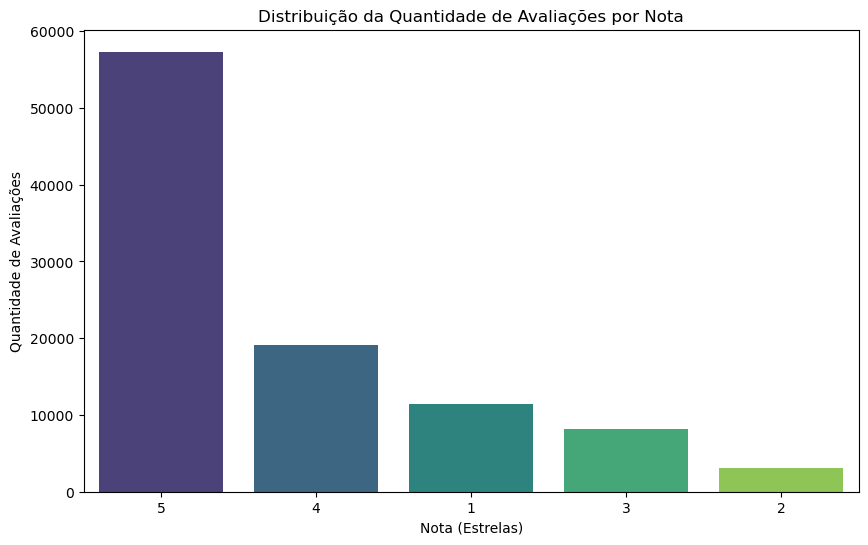

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='review_score', data=df, palette='viridis', order=df['review_score'].value_counts().index)
plt.title('Distribuição da Quantidade de Avaliações por Nota')
plt.xlabel('Nota (Estrelas)')
plt.ylabel('Quantidade de Avaliações')
plt.show()

### 2. Criação e Análise da Variável Alvo (Sentimento)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_13676\458142238.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binario['sentimento'] = df_binario['sentimento'].astype(int)


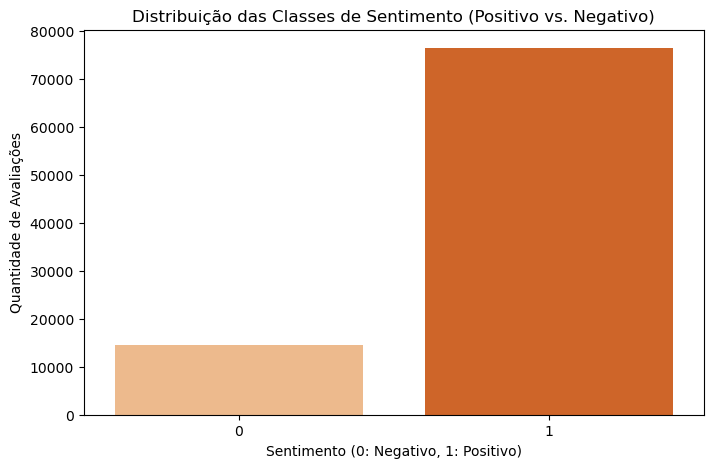

In [ ]:
df['sentimento'] = df['review_score'].apply(lambda x: 1 if x >= 4 else (0 if x <= 2 else None))

df_binario = df.dropna(subset=['sentimento'])
df_binario['sentimento'] = df_binario['sentimento'].astype(int)

plt.figure(figsize=(8, 5))
sns.countplot(x='sentimento', data=df_binario, palette='Oranges')
plt.title('Distribuição das Classes de Sentimento (Positivo vs. Negativo)')
plt.xlabel('Sentimento (0: Negativo, 1: Positivo)')
plt.ylabel('Quantidade de Avaliações')
plt.show()